In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

Simulations of field strength dependency of T1 and T2 in brain tissue.

In [16]:
def rooney_T1(B0, tissue='WM'):
    gamma = 42.577E6
    
    if tissue=='WM':
        return 0.00071 * (gamma*B0)**0.382
    elif tissue=='GM':
        return 0.00116 * (gamma*B0)**0.376
    elif tissue=='BLOOD':
        return 0.00335 * (gamma*B0)**0.340
    
def wangRM(B0):
    return 12.2*1.0/B0

def wangT1(B0, f=0.281, k=1.5, Rw=0.4):
    Rm = wangRM(B0)
    km = k/f
    kw = k/(1-f)

    T1_fast = 1/(0.5*(Rw + Rm + kw + km + np.sqrt((Rw - Rm + kw - km)**2 + 4 * kw * km)))
    T1_slow = 1/(0.5*(Rw + Rm + kw + km - np.sqrt((Rw - Rm + kw - km)**2 + 4 * kw * km)))

    return np.array([T1_fast, T1_slow])

# Fischer et al. 1990
def fischer_est_R1(A, D, f, fc, bp, R1w=0.23, R2=0, WC=0, LC=0):
    R1 = R1w + D + A/(1+(f/fc)**bp)
    return R1

def fischer_calc_contrast(f, tisA, tisB):
    R1A = fischer_est_R1(f=f, **tisA)
    R1B = fischer_est_R1(f=f, **tisB)

    return abs(R1A - R1B) / (R1A + R1B) 

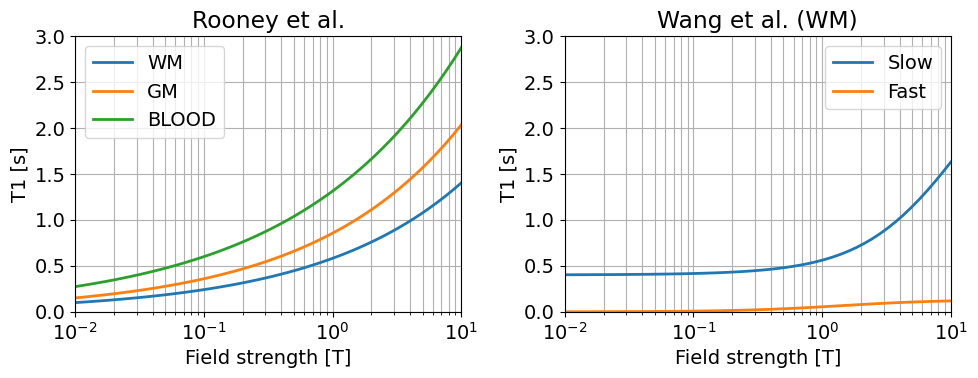

In [11]:
fig = plt.figure(figsize=(10,4))
B0 = np.logspace(-2, 1)
ax = fig.add_subplot(1,2,1)
for tis in ['WM', 'GM', 'BLOOD']:
    plt.semilogx(B0, rooney_T1(B0, tis), label=tis, linewidth=2)

plt.legend()
plt.xlabel("Field strength [T]")
plt.ylabel("T1 [s]")
plt.title('Rooney et al.')
plt.axis([10E-3, 10, 0, 3])
plt.grid(which='both')

ax = fig.add_subplot(1,2,2)
T1w = wangT1(B0)
plt.semilogx(B0, T1w[1,:], label='Slow', linewidth=2)
plt.semilogx(B0, T1w[0,:], label='Fast', linewidth=2)
plt.legend()
plt.xlabel('Field strength [T]')
plt.ylabel('T1 [s]')
plt.title("Wang et al. (WM)")
plt.axis([10E-3, 10, 0, 3])
plt.grid(which='both')

plt.tight_layout()
plt.legend()
plt.show()

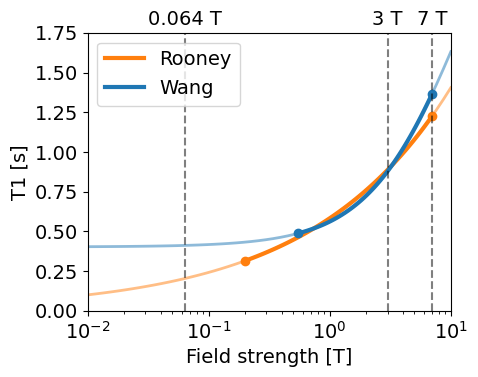

In [12]:
plt.figure(figsize=(5,4))

# Boundaries of the two methods
wang_lim = [.55, 7]
rooney_lim = np.array([.2, 7])

T1w = wangT1(B0)
B0_rooney = np.logspace(np.log10(rooney_lim[0]), np.log10(rooney_lim[1]))
B0_wang = np.logspace(np.log10(wang_lim[0]), np.log10(wang_lim[1]))
T1w_lim = wangT1(B0_wang)
T1w_rooney_lim = rooney_T1(B0_rooney)

plt.semilogx(B0, rooney_T1(B0, 'WM'), linewidth=2, alpha=0.5, color='C01')
plt.semilogx(rooney_lim, rooney_T1(rooney_lim), 'o', color='C01')
plt.semilogx(B0_rooney, T1w_rooney_lim, linewidth=3, color='C01', label='Rooney')

plt.semilogx(B0, T1w[1,:], linewidth=2, alpha=0.5, color='C00')
plt.semilogx(wang_lim[0], wangT1(wang_lim[0])[1], 'o', color='C00')
plt.semilogx(wang_lim[1], wangT1(wang_lim[1])[1], 'o', color='C00')
plt.semilogx(B0_wang, T1w_lim[1,:], linewidth=3, color='C00', label='Wang')

for b0_lab in [64E-3, 3, 7]:
    plt.semilogx(2*[b0_lab], [0,2], '--k', alpha=0.5)
    plt.text(b0_lab, 1.8, f'{b0_lab} T', horizontalalignment='center')

plt.legend(loc='upper left')
plt.xlabel('Field strength [T]')
plt.ylabel('T1 [s]')
# plt.title("T1 WM comparison")
plt.axis([10E-3, 10, 0, 1.75])
plt.tight_layout()
plt.savefig('Wang_vs_Rooney.png', dpi=300)
plt.show()

Fischer et al. 1990

In [13]:
# Table 2 - 1 subject, 1 area
tab2_WM = {'D':-1.38, 'A':18.25, 'fc':0.165, 'bp':0.291, 'R2':17.21, 'WC':71.5, 'LC':17.0}
tab2_GM = {'D':0.105, 'A':11.66, 'fc':0.059, 'bp':0.42, 'R2':9.63, 'WC':84.0, 'LC':5.4}

# Table 4 - 1 subject, 7 areas
tab4_WM = {'D':-1.06, 'A':15.97, 'fc':0.32, 'bp':0.328, 'R2':16.9, 'WC':72.0, 'LC':16.3}
tab4_GM = {'D':0.13, 'A':11.21, 'fc':0.081, 'bp':0.428, 'R2':9.67, 'WC':84.0, 'LC':4.2}

# Table 5 - 4 subject, 23 areas
tab5_WM = {'D':-1.52, 'A':19.07, 'fc':0.067, 'bp':0.251, 'R2':16.14, 'WC':71.6, 'LC':None}
tab5_GM = {'D':0.11, 'A':11.08, 'fc':0.085, 'bp':0.438, 'R2':9.64, 'WC':83.7, 'LC':None}

f = np.logspace(-2, np.log10(200))

Reproducing Figure 5
Maximum T1 contrast at 7.88 MHz


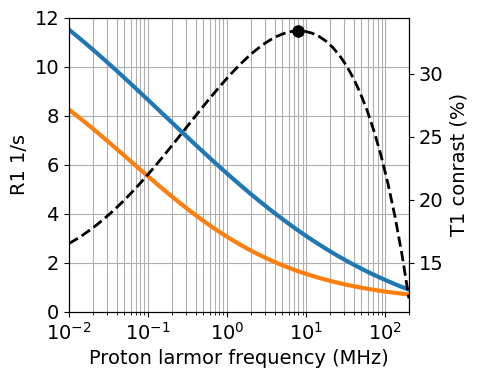

In [19]:
print("Reproducing Figure 5")
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
plt.semilogx(f, fischer_est_R1(f=f, **tab2_WM), linewidth=3)
plt.semilogx(f, fischer_est_R1(f=f, **tab2_GM), linewidth=3)
plt.grid(which='both')
plt.xlabel('Proton larmor frequency (MHz)')
plt.ylabel('R1 1/s')
plt.axis([0.01, 200, 0, 12])

ax2 = ax.twinx()
T1_contrast = 100*fischer_calc_contrast(f, tab2_WM, tab2_GM)
max_C_i = np.argmax(T1_contrast)
print('Maximum T1 contrast at %0.2f MHz' % f[max_C_i])
plt.semilogx(f, T1_contrast, '--k', linewidth=2)
plt.semilogx(f[max_C_i], T1_contrast[max_C_i], 'o', color='black', markersize=8)
plt.ylabel('T1 conrast (%)')
plt.tight_layout()
plt.show()